In [2]:
import rioxarray
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib import colors
import glob
from land_wavelet import wclass
import cv2
from utils import u_mtg
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
files = glob.glob('/home/ck/DIR/cornkle/data/EUMDAC_MTG_TESTS/MTG_VIS_tifs/FCI_tif_NRT/*.tif')

In [28]:
mtg_coords = xr.open_dataset('/home/ck/DIR/cornkle/data/EUMDAC_MTG_TESTS/mtg_coords_1km.nc')

In [48]:
full_domain = rioxarray.open_rasterio('/home/ck/DIR/cornkle/data/EUMDAC_MTG_TESTS/domain_tifs/FCIL1HRFI_20250110T085007Z_20250110T085924Z_epct_6c1bcdbc_F.tif')

In [62]:
mtg_coords.latitude[4000:4010,7000].values-mtg_coords.latitude[4001:4011,7000].values

array([-0.00957085, -0.0095702 , -0.00956954, -0.00956889, -0.00956824,
       -0.00956759, -0.00956694, -0.00956629, -0.00956564, -0.00956499])

In [4]:
def read_geotiff(file):
    data = rioxarray.open_rasterio(file)
    data = data.where(data.values<60000, other=0)
    #data = (data - np.min(data)) / (np.max(data) - np.min(data))*10
    #data = data.where((data>2) & (data<3))
    
    return data
#files[120]  - standard test file: FCIL1HRFI_20241221T110112Z_20241221T110406Z_epct_36c25c86_FC.tif 
#da = rioxarray.open_rasterio('/home/ck/DIR/cornkle/data/EUMDAC_MSG_TESTS/FCI_HRFI_VIS0.6__m_Image_-_MTG_-_0_degree_2024-12-11_12_20/17240bd0-f98e-4399-b767-ef10435f7366.tiff')

In [42]:
da_test = rioxarray.open_rasterio('/home/ck/DIR/cornkle/data/EUMDAC_MTG_TESTS/domain_tifs/scratch_tifs_coords.tif')
da_test = da_test.where(da_test.values<60000, other=0)

In [49]:
full_domain

<xarray.DataArray (band: 1, y: 22311, x: 22272)> Size: 2GB
[496910592 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 178kB -5.568e+06 -5.567e+06 ... 5.567e+06 5.568e+06
  * y            (y) float64 178kB 5.568e+06 5.567e+06 ... -5.567e+06 -5.567e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:        Area
    ancillary_variables:  pixel_quality
    coordinates:          y x
    description:          VIS 0.6 HR Effective radiance
    long_name:            VIS 0.6 HR Effective radiance
    unit:                 mW.m-2.sr-1.(cm-1)-1
    ...                   ...
    valid_range:          [0, 4095]
    warm_add_offset:      0
    warm_scale_factor:    0
    _FillValue:           65535.0
    scale_factor:         1.0
    add_offset:           0.0

In [31]:
mtg_coords.latitude[-2000::,7000].values

array([35.98098725, 35.99367125, 36.00635844, ...,         nan,
               nan,         nan], shape=(2000,))

In [5]:
da = read_geotiff(files[120])
#da_box = da.isel(x=slice(1000,2000), y=slice(1500,2500)).squeeze()

In [7]:
da.x

<xarray.DataArray 'x' (x: 4376)> Size: 35kB
array([1286825.821445, 1287325.290108, 1287824.75877 , ..., 3471002.282506,
       3471501.751168, 3472001.219831], shape=(4376,))
Coordinates:
  * x            (x) float64 35kB 1.287e+06 1.287e+06 ... 3.472e+06 3.472e+06
    spatial_ref  int64 8B 0

/home/ck/miniforge3/envs/general/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


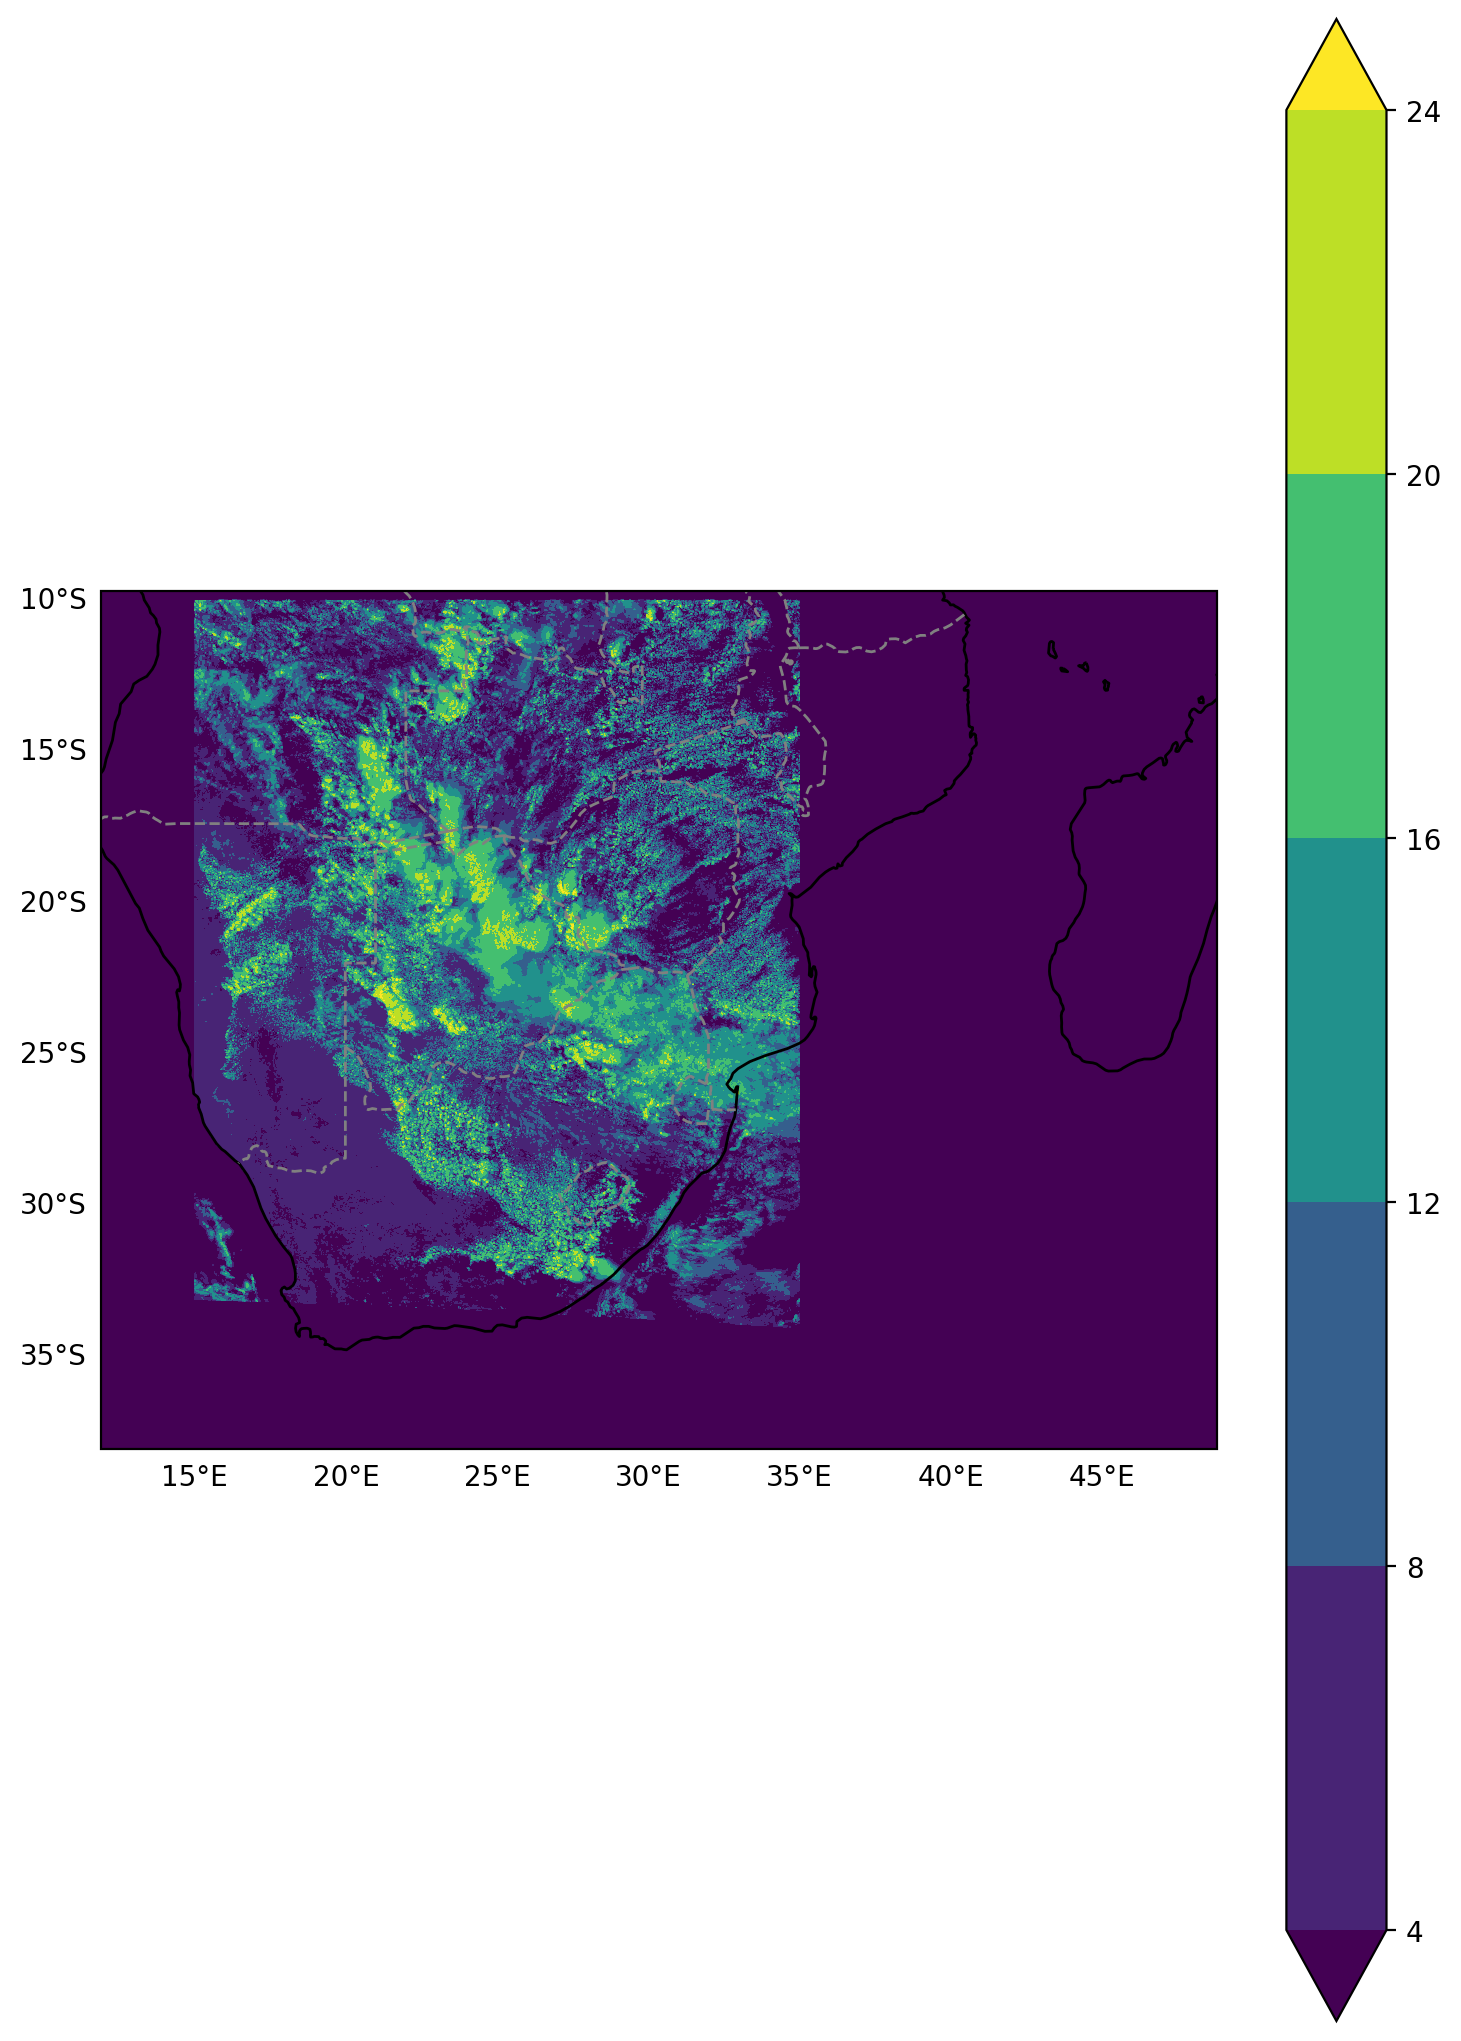

In [44]:
f = plt.figure(figsize=(9,13), dpi=200)
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
plt.contourf(da_test.x.values, da_test.y.values, da_test.squeeze(), transform=ccrs.PlateCarree(), cmap='viridis', extend='both')
ax.coastlines()

xl = ax.gridlines(draw_labels=True);
xl.top_labels = False
xl.right_labels = False
xl.xlines = False
xl.ylines=False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--', color='grey');

cbar = plt.colorbar()


In [21]:
# determine the geolocation for the full disk grid for a specific SSD
#rs,cs = np.indices((grid_parameters[ssd]['reference_grid_number_of_rows'],grid_parameters[ssd]['reference_grid_number_of_columns']))
rs = da.x.values
cs = da.y.values
lats,lons = u_mtg.grid_coordinates_to_geo_coordinates(rs,cs,grid_parameters,ssd)

ValueError: operands could not be broadcast together with shapes (5038,) (4376,) 

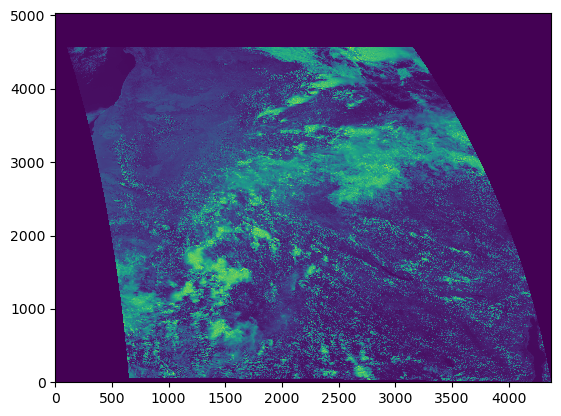

In [12]:
plt.pcolormesh(da.squeeze())

In [13]:
da

<xarray.DataArray (band: 1, y: 5038, x: 4376)> Size: 88MB
array([[[ 0.       ,  0.       ,  0.       , ...,  6.111043 ,
          5.2309394,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  9.3546505,
          4.386324 ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ..., 11.150346 ,
          6.4943137,  0.       ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]]], shape=(1, 5038, 4376), dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 35kB 1.287e+06 1.287e+06 ... 3.472e+06 3.472e+06
  * y            (y) float64 40kB -1.059e+06 -1.059e+06 ... -3.574e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:        Area
    ancillary_variables:  pixel_quality
    coordinates:          y x
    description:          VIS 0.6 HR Effective radiance
    long_name:            VIS 0.6 HR Effective radiance
    unit:                 mW.m-2.sr-1.(cm-1)-1
    ...                   ...
    valid_range:          [0, 4095]
    warm_add_offset:      0
    warm_scale_factor:    0
    _FillValue:           65535.0
    scale_factor:         1.0
    add_offset:           0.0

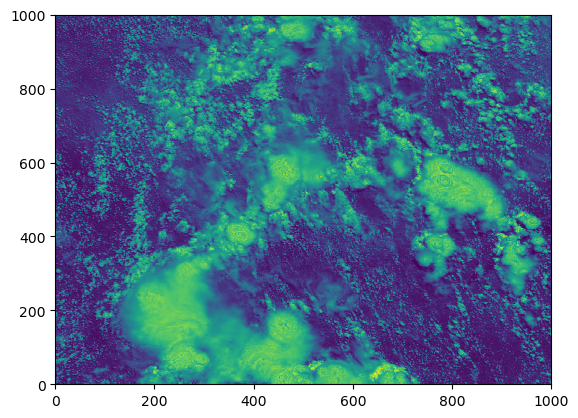

In [9]:
plt.pcolormesh(da_box.squeeze())

In [248]:
### Create a wavelet decomposition object first. In this example, we initialise the SM5k 5km setup. The setups can be defined in land_wavelet.constants
wObj = wclass.landwav('VIS_05')

Initialised wavelet with scales:  [ 1.5         1.78381067  2.12132034  2.52268925  3.          3.56762135
  4.24264069  5.04537849  6.          7.13524269  8.48528137 10.09075698
 12.         14.27048538 16.97056275 20.18151397 24.         28.54097076
 33.9411255 ]


In [249]:
### The next step prepares the SM image for the wavelet routine. NaNs are removed by filling in zeros that can be masked again after wavelet application.
wObj.read_img(da_box.values, np.arange(0,da_box.shape[0],0.5), np.arange(0,da_box.shape[1],0.5))

Text(0.5, 1.0, 'Prepared cloud image')

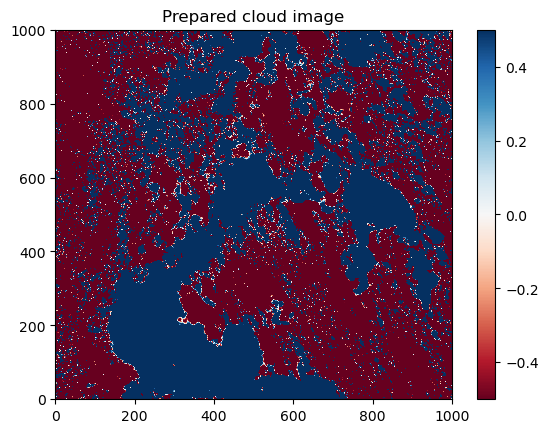

In [250]:
# The object saves the filtered image
plt.pcolormesh(wObj.image, vmin=-0.5, vmax=0.5, cmap='RdBu')  # the prepared (nans removed, anomaly) image
plt.colorbar()
plt.title('Prepared cloud image')

In [251]:
# We now apply the wavelet scale decomposition to the image as defined in the wObj object. This step saves wavelet coefficients and powers to the object.
# The resulting powers could be used for diverse analyses.

coeffs, power, scales, period = wObj.applyWavelet(normed='stddev', ge_thresh=None, le_thresh=0, fill=0.01)

Wavelet coeffs (none or stddev) and power (none, stddev or scale) normed by: stddev Please note: Choose none if value reconstruction is intended.


Text(0.5, 1.0, '33.941125496954285 km scale wavelet coefficients')

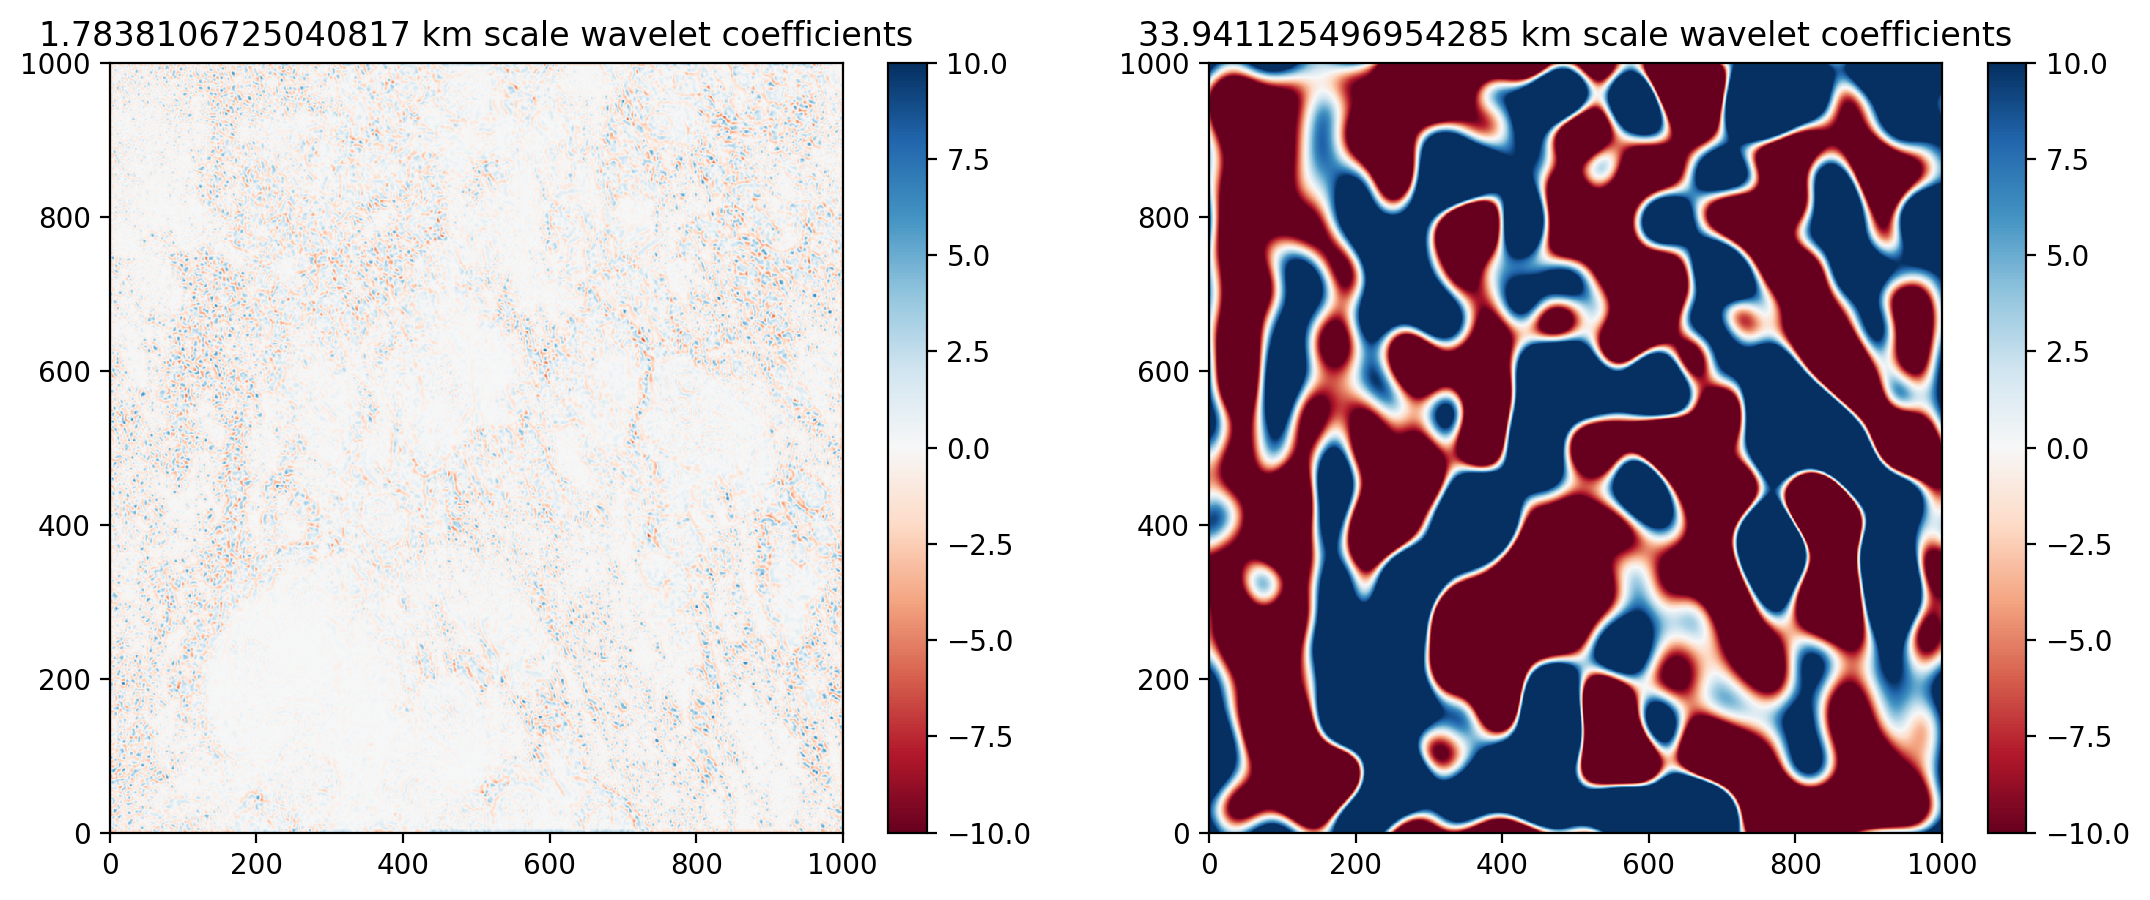

In [252]:
### This shows wavelet coefficient images of two chosen scales

f = plt.figure(figsize=(13,5), dpi=200)

ax = f.add_subplot(121)
scale_id = 1
plt.pcolormesh(wObj.coeffs[scale_id,:,:], vmin=-10,vmax=10, cmap='RdBu')
plt.colorbar()
plt.title(str(wObj.scales[scale_id])+' km scale wavelet coefficients')


ax = f.add_subplot(122)
scale_id = -1

plt.pcolormesh(wObj.coeffs[scale_id,:,:], vmin=-10, vmax=10, cmap='RdBu')
plt.colorbar()
plt.title(str(wObj.scales[scale_id])+' km scale wavelet coefficients')

Text(0.5, 1.0, 'Contours: 2.0 km power on SM')

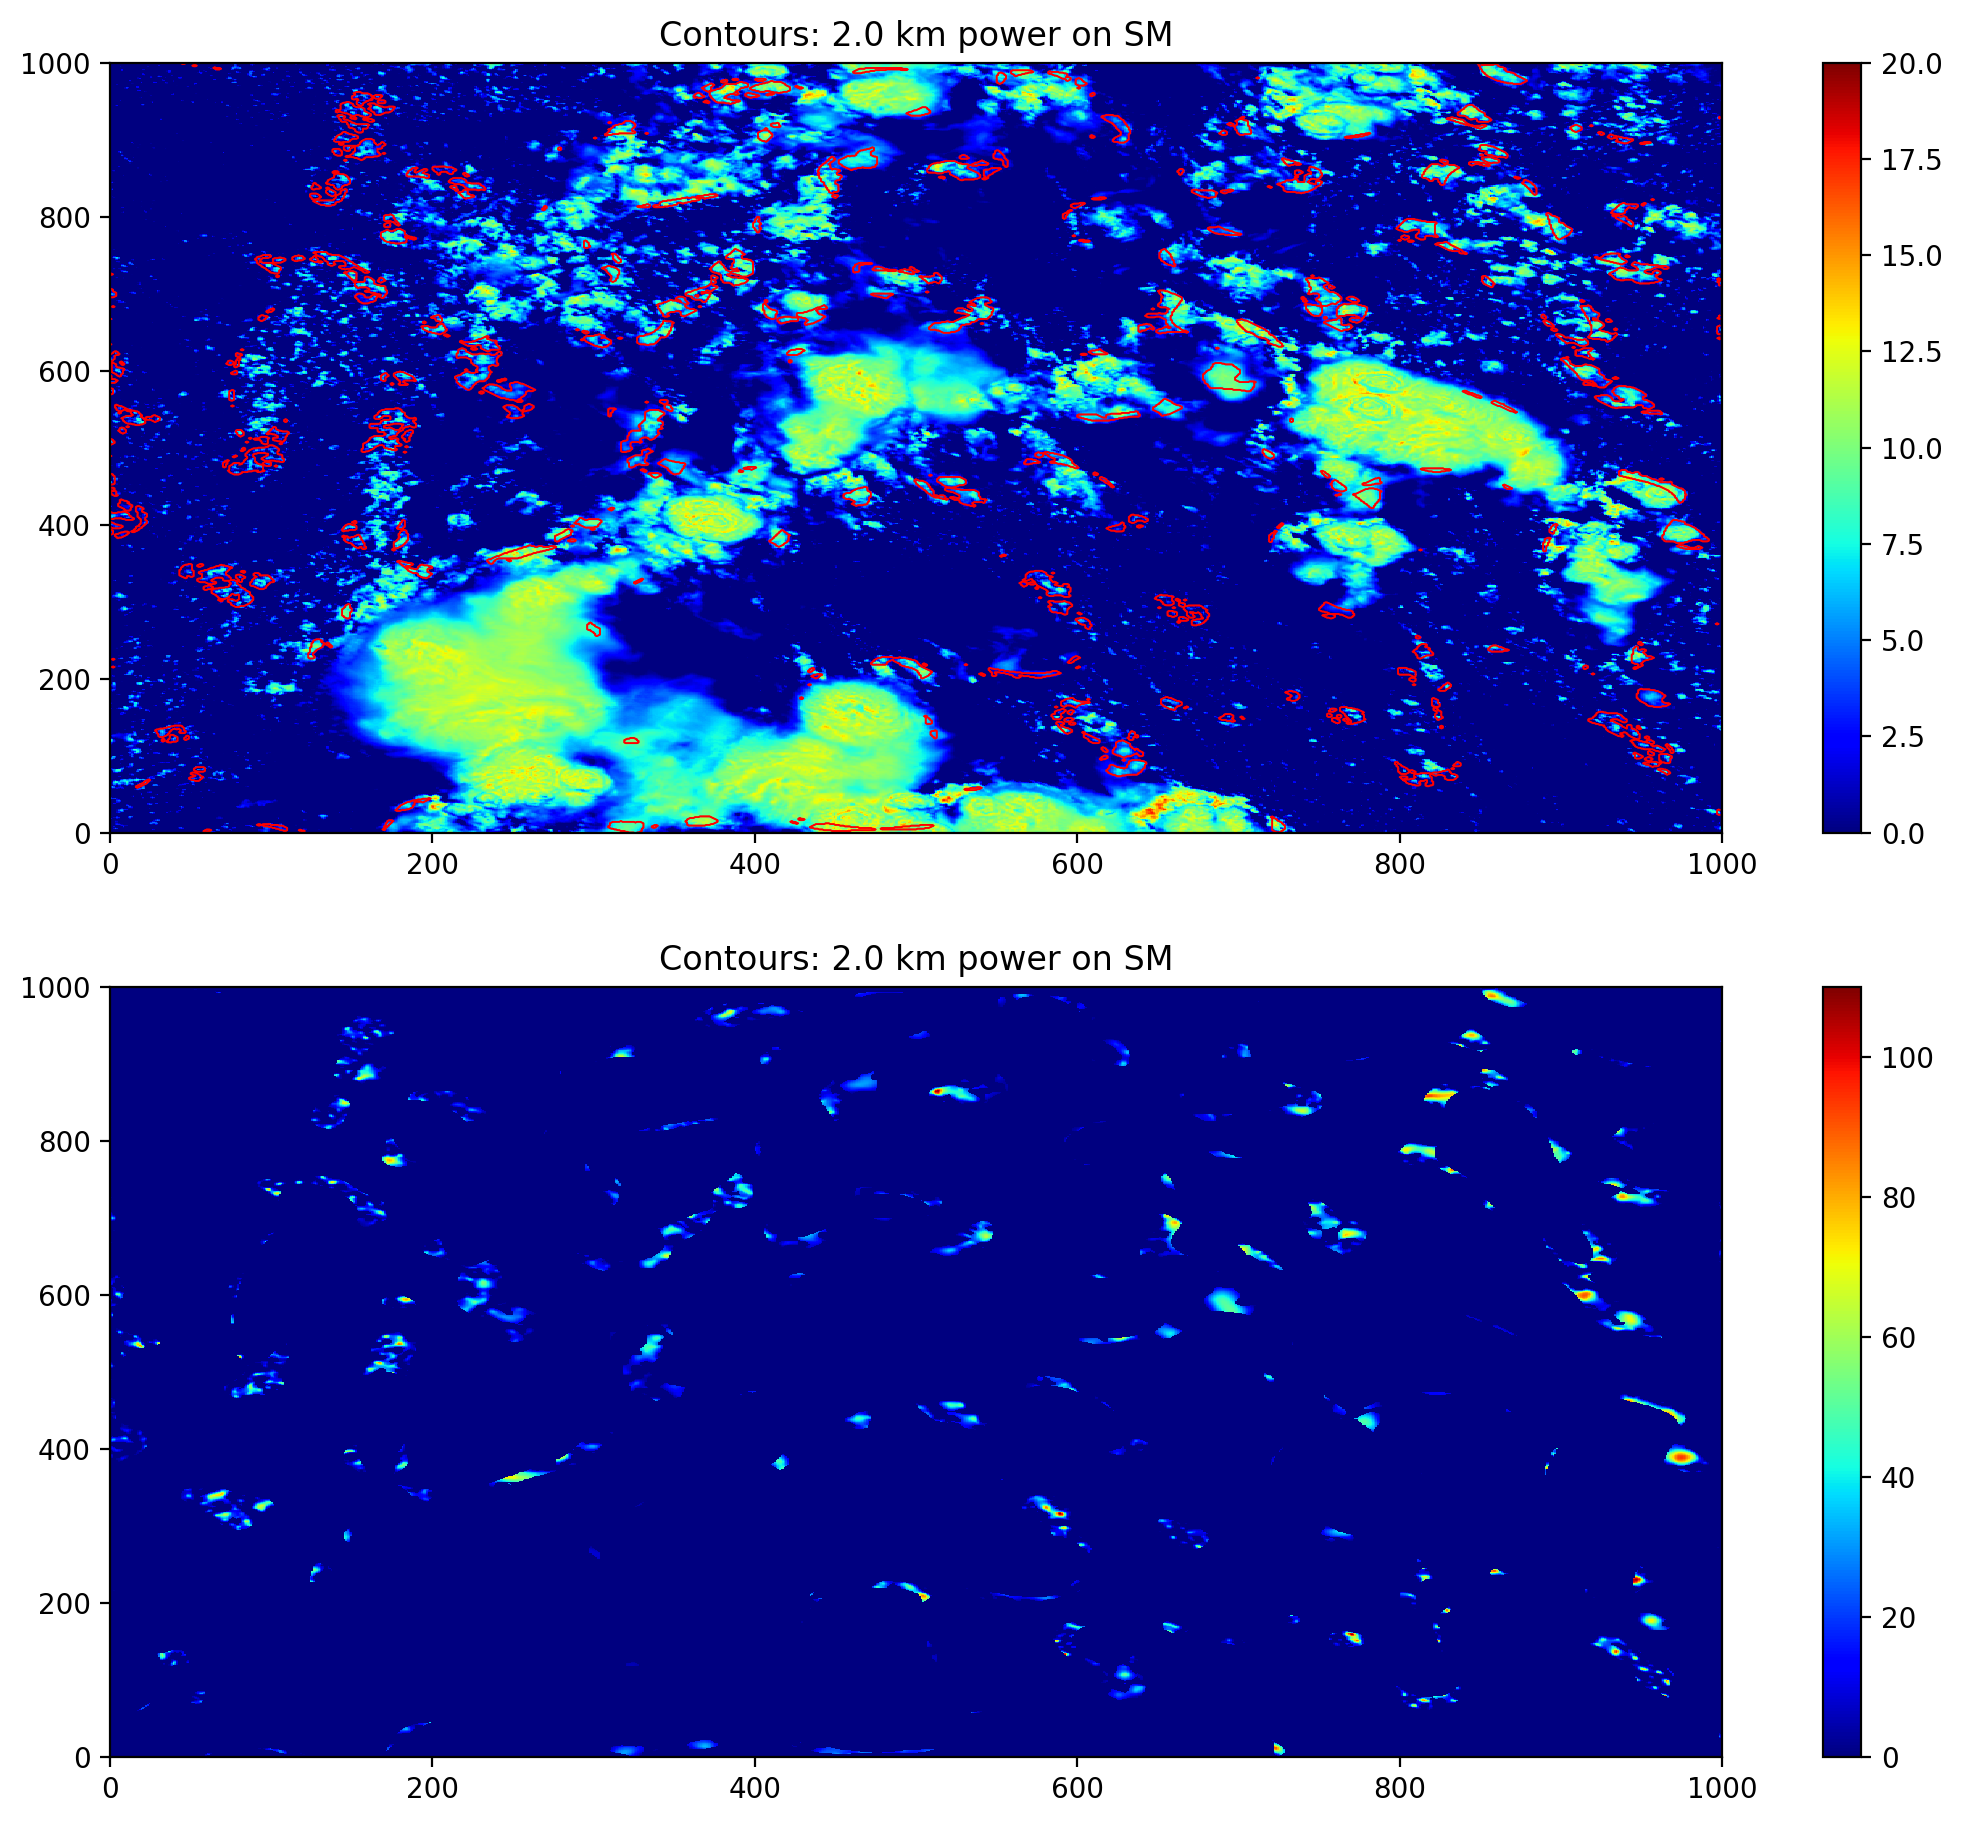

In [261]:
### Same powers as above but as contours plotted onto the SM image. 

f = plt.figure(figsize=(13,11), dpi=200)

ax = f.add_subplot(211)
scale_id = 2
plt.pcolormesh(wObj.image, vmax=20, vmin=0, cmap='jet')
plt.colorbar()
mask = ((np.sum(wObj.power[0:8,:,:],axis=0)<1) | (np.sum(wObj.power[-6::,:,:],axis=0)<0.5)) | (np.abs(wObj.coeffs[-1,:,:]) > 10)
#mask = ((np.sum(wObj.power[0:8,:,:],axis=0)<0.5) | (np.sum(wObj.power[-6::,:,:],axis=0)<0.5)) | (np.abs(wObj.coeffs[-1,:,:]) > 1)
psum = np.sum(wObj.power[:,:,:],axis=0)
psum[mask] = 0
plt.contour(psum, levels=[0,1], colors=['r'], linewidths=0.6)
plt.title('Contours: '+str(np.floor(wObj.scales[scale_id]))+' km power on SM')

ax = f.add_subplot(212)
scale_id = 2
plt.pcolormesh(psum, cmap='jet')
plt.colorbar()

plt.contour(wObj.power[-1,:,:], levels=[-1,10], colors=['r'], linewidths=0.6)
plt.title('Contours: '+str(np.floor(wObj.scales[scale_id]))+' km power on SM')

In [262]:
bools = psum

In [263]:
bools[bools>0]=1
#bools = (bools-1)*-1
bools = bools.astype(np.uint8)

In [264]:
from land_wavelet import line_detection

In [265]:
merged_lines = line_detection.run_line(bools, threshold=5, minLineLength=50, maxLineGap=5)

In [266]:
merged_lines

array([[905, 608, 954, 554]], dtype=int32)

In [267]:
#circles = line_detection.run_circle(bools, min_radius=5, max_radius=0)

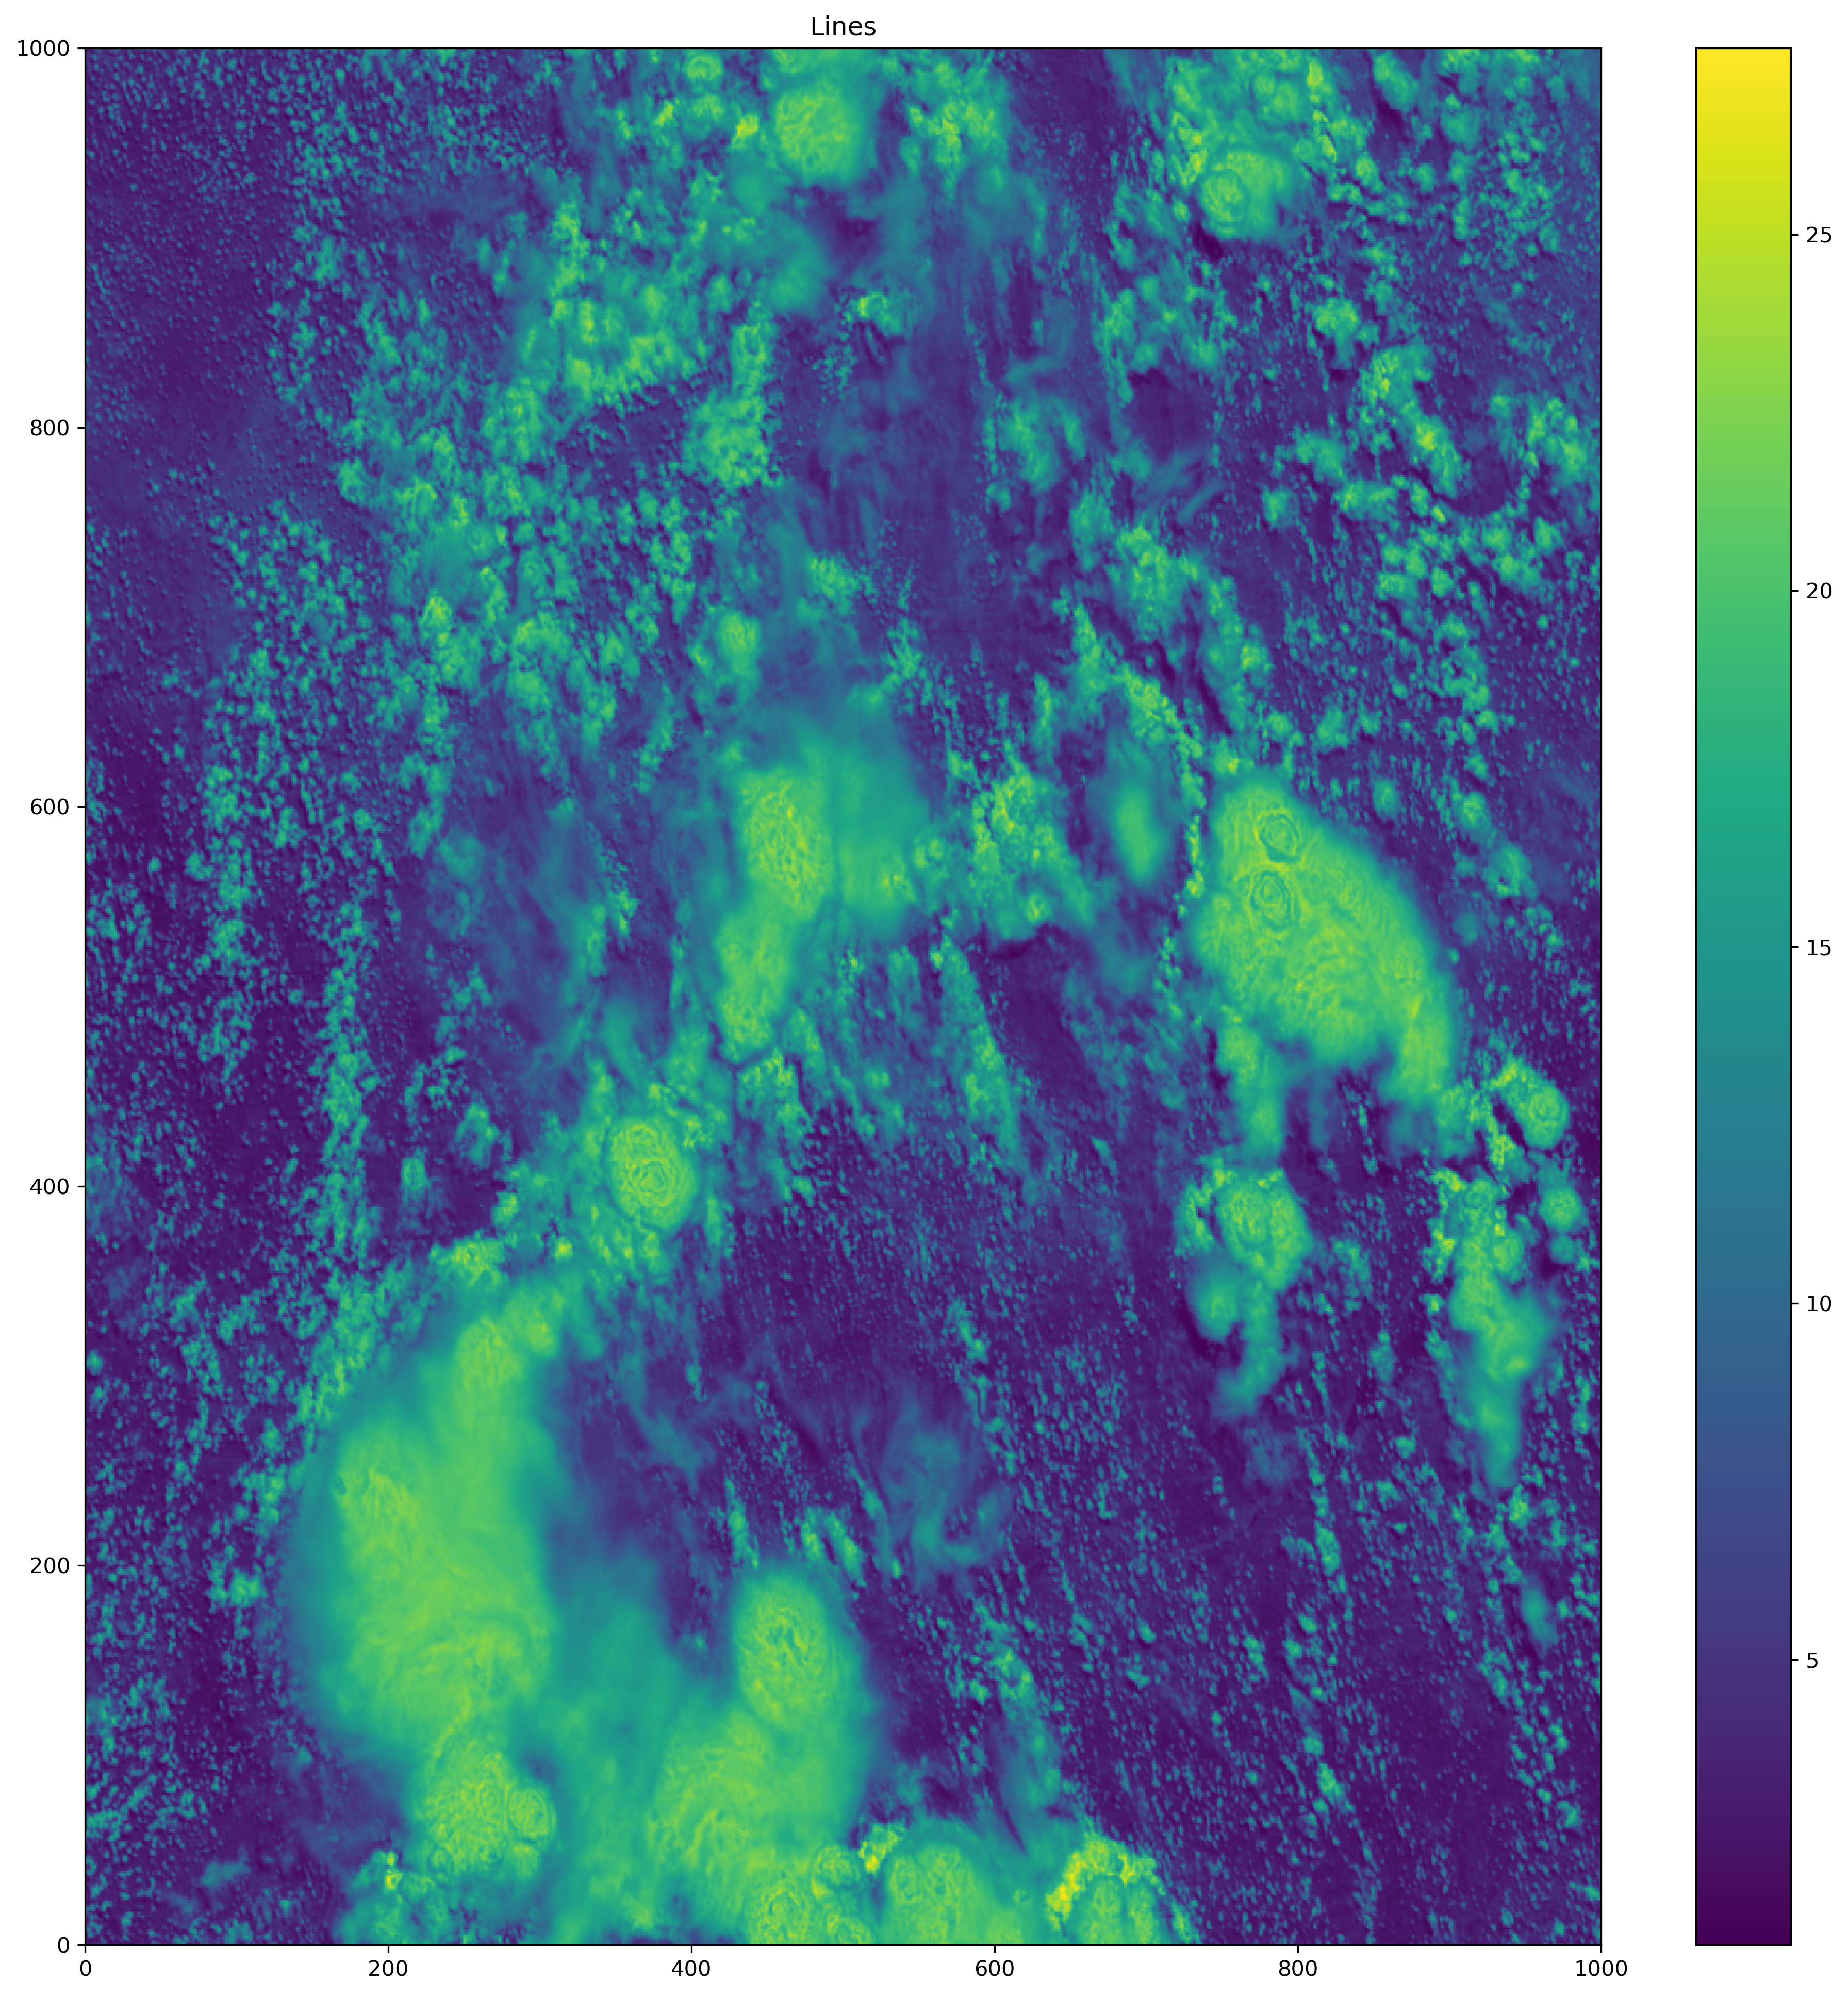

In [268]:
f = plt.figure(figsize=(13,13), dpi=300)

# ax = f.add_subplot(221)

# mp=ax.pcolormesh(bools, cmap='jet')
# plt.colorbar(mp)
# plt.title('Bools')


ax = f.add_subplot(111)

mp= ax.pcolormesh(da_box, cmap='viridis', zorder=0)
plt.colorbar(mp)
plt.title('Lines')

#for line in merged_lines:
# for x1, y1, x2, y2 in merged_lines:
#     print(x1, y1, x2, y2)
#     ax.plot([x1, x2], [y1, y2], marker = 'x', markersize=3, color='purple', linestyle='solid', linewidth=2, zorder=99)
plt.tight_layout()
f.savefig('/home/ck/Desktop/test2.png')